In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Dataset from Kaggle

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 98% 796M/812M [00:07<00:00, 194MB/s]
100% 812M/812M [00:07<00:00, 112MB/s]


In [ ]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [ ]:
from zipfile import ZipFile

dataset = '/content/dogs-vs-cats.zip'

#read the dataset and extract all the files present in this dataset

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  #if extracted print this
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
#do the same read and extraction for train.zip
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


Printing the names of the images

In [ ]:
file_names = os.listdir('/content/train')
print(file_names)

['cat.1443.jpg', 'dog.7620.jpg', 'cat.6714.jpg', 'cat.8566.jpg', 'cat.11037.jpg', 'dog.2908.jpg', 'cat.6563.jpg', 'dog.9168.jpg', 'cat.10749.jpg', 'cat.12092.jpg', 'dog.11764.jpg', 'cat.6703.jpg', 'cat.8406.jpg', 'dog.1569.jpg', 'cat.10853.jpg', 'cat.683.jpg', 'dog.10554.jpg', 'cat.8218.jpg', 'dog.7363.jpg', 'dog.6812.jpg', 'dog.9072.jpg', 'dog.4732.jpg', 'dog.4876.jpg', 'cat.4717.jpg', 'dog.5178.jpg', 'cat.8629.jpg', 'cat.59.jpg', 'cat.9880.jpg', 'dog.5158.jpg', 'dog.11906.jpg', 'cat.3365.jpg', 'dog.1599.jpg', 'dog.10301.jpg', 'cat.3024.jpg', 'cat.7812.jpg', 'dog.388.jpg', 'cat.5599.jpg', 'dog.5927.jpg', 'dog.11371.jpg', 'dog.11575.jpg', 'dog.9320.jpg', 'cat.3452.jpg', 'cat.2105.jpg', 'cat.1724.jpg', 'cat.4793.jpg', 'dog.3891.jpg', 'cat.8495.jpg', 'dog.6597.jpg', 'cat.4699.jpg', 'cat.7180.jpg', 'cat.3602.jpg', 'dog.7514.jpg', 'cat.9071.jpg', 'cat.2317.jpg', 'dog.8337.jpg', 'dog.12434.jpg', 'dog.10621.jpg', 'cat.12471.jpg', 'dog.2136.jpg', 'cat.1971.jpg', 'dog.2905.jpg', 'dog.8619.jpg'

Importing the dependencies


In [ ]:
import numpy as np
#from Pillow lib
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
#open cv but as an alternative for google colab


Displaying Images

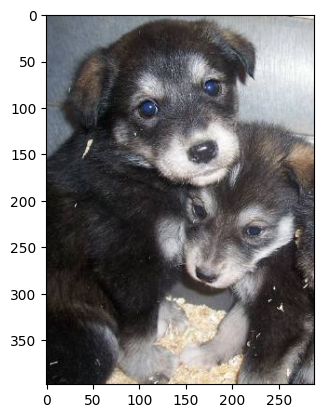

In [ ]:
#display dog image
img=mpimg.imread('/content/train/dog.2908.jpg')
#reads the imgfile
imgplot = plt.imshow(img)
plt.show()

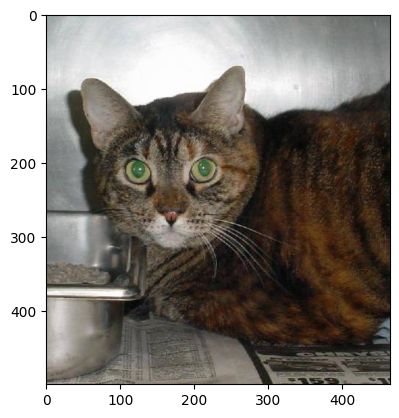

In [ ]:
#display cat image
img=mpimg.imread('/content/train/cat.1443.jpg')
#reads the imgfile
imgplot = plt.imshow(img)
plt.show()


# **Resizing The Images**

While training images we have to notice that the dimensions of the Images varies and while training your neural network all the images have to be of same sizes hence as we are using MobileNetV2 and it needs images to be in (224,224)
SO we have to resize the pixels so then the model can read the data and also we can convert this rgb images to greyscale as the grayscale images would be smaller in size and training would be successful within a short period of time


In [ ]:
file_names = os.listdir('/content/train/')
#for img_file in file_names
for i in range(5):
#first five range
  name = file_names[i]
  print(name[0:3])
  #just to print the first 3 letters we use splicing

cat
dog
cat
cat
cat


In [ ]:
#Calculate how many cat images and dog images are there we initialize a counter variable
file_names = os.listdir('/content/train/')

dog_count = 0
cat_count=0

for img_file in file_names:
  name = img_file[0:3]

  if name == 'dog':
    dog_count += 1

  else:
    cat_count +=1


print('Number of dog images: ',dog_count)
print('Number of cat images: ',cat_count)

Number of dog images:  12500
Number of cat images:  12500


In [ ]:
#we cannot take all these 25k images we'll just take 2k or 3k images and we only resize those images
#creating a directory for these resized images
os.mkdir('/content/resized images')

In [ ]:
original_folder = '/content/train/' #not resized folder
resized_folder = '/content/resized images/' #resized iamges
#including forward slash in the end bcz we are focused on finding the path of the image

for i in range(2000):
#for loop that runs 2000 times and takes name each individual file on each iterations
  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename
#takes original folder and concatenate the name of the file one by one iterations of range 2k then we resize it

  img = Image.open(img_path)
  #Image.open is a function that we have in PIL(pillow)library
  img= img.resize((224,224))
  img = img.convert('RGB')
#resize and save
  newImgPath = resized_folder+filename
  img.save(newImgPath)

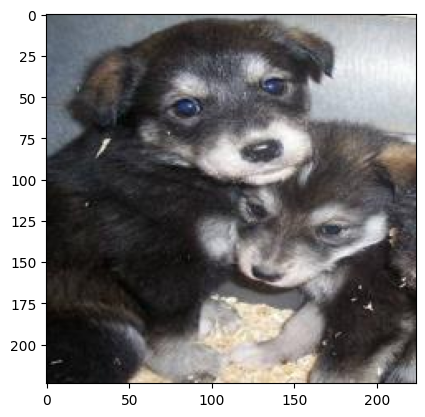

In [ ]:
#display resized dog image
img=mpimg.imread('/content/resized images/dog.2908.jpg')
#reads the imgfile
imgplot = plt.imshow(img)
plt.show()

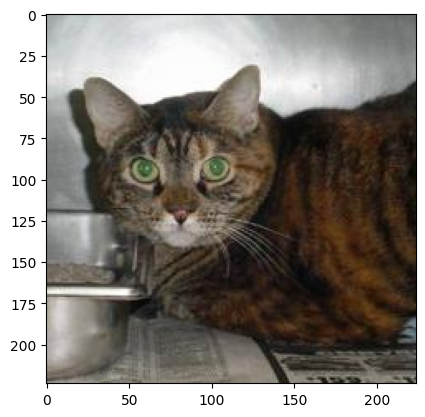

In [ ]:
# display resized cat image
img = mpimg.imread('/content/resized images/cat.1443.jpg')
imgplt = plt.imshow(img)
plt.show()

# Creating labels for resized images of dogs and cats

cats = 0

dogs = 1

In [ ]:
#create a for loop that will iterate through the resized image folder and assign labels
filenames = os.listdir('/content/resized images/')

labels = [] #empty list

for i in range(2000):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)


In [ ]:
print(filenames[0:5])
print(len(filenames))

['cat.1443.jpg', 'dog.7620.jpg', 'cat.6714.jpg', 'cat.8566.jpg', 'cat.11037.jpg']
2000


In [ ]:
#now for labels
print(labels[0:5])
print(len(labels))

[0, 1, 0, 0, 0]
2000


In [ ]:
# counting the images of dogs and cats out of 2000 images
# A func in numpy lib which tells how many unique var are there
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[1022  978]


# Converting to numpy arrays

we have read all these images and convert them to numpy arrays bcz wkt our models cannot understand images but definitely understand numbers

In [ ]:
import cv2 #Open CV lib
import glob

In [ ]:
img_dir = '/content/resized images/'
img_extensions = ['png','jpg']

files=[]
#locate the file and '*.' as we have both jpg and png format to check whether file is in jpg or png and convert them to numpy array
[files.extend(glob.glob(img_dir + '*.' +e)) for e in img_extensions]
#similar to appending where we to the files list as we take each file name and reading it through cv.imread Open CV lib and convert it to numpy array
dog_cat_img = np.array([cv2.imread(file) for file in files])

In [ ]:
print(dog_cat_img)

[[[[168 168 162]
   [168 168 162]
   [168 168 162]
   ...
   [110 111 109]
   [109 110 108]
   [109 110 108]]

  [[168 168 162]
   [168 168 162]
   [168 168 162]
   ...
   [108 109 107]
   [108 109 107]
   [107 108 106]]

  [[167 167 161]
   [168 168 162]
   [167 167 161]
   ...
   [107 108 106]
   [106 107 105]
   [105 106 104]]

  ...

  [[ 76  84  91]
   [ 77  85  92]
   [ 74  82  89]
   ...
   [100 108 108]
   [ 93 101 101]
   [ 46  54  54]]

  [[ 63  69  74]
   [ 69  75  80]
   [ 74  80  85]
   ...
   [ 67  77  77]
   [101 111 111]
   [119 129 129]]

  [[141 147 152]
   [143 149 154]
   [141 147 152]
   ...
   [ 18  28  28]
   [ 59  69  69]
   [120 130 130]]]


 [[[ 29  22  25]
   [ 29  22  25]
   [ 30  23  26]
   ...
   [ 40  41  61]
   [ 43  44  64]
   [ 38  39  59]]

  [[ 30  23  26]
   [ 30  23  26]
   [ 30  23  26]
   ...
   [ 40  41  61]
   [ 43  44  64]
   [ 38  39  59]]

  [[ 29  22  25]
   [ 29  22  25]
   [ 30  23  26]
   ...
   [ 40  41  61]
   [ 43  44  64]
   [ 38  39

In [ ]:
type(dog_cat_img) #dtype

numpy.ndarray

In [ ]:
print(dog_cat_img.shape)
#no of img,dimensions,3 represents rgm imgs if greyscale gives 1 or ntng

(2000, 224, 224, 3)


In [ ]:
X = dog_cat_img
Y = np.asarray(labels)

#X stores imgs of dogs and cats and their corresponding labels are stored in Y

# Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
#from sklearn 80 train-20 test and The random_state parameter ensures that the same randomization is used each time the code is run, resulting in the same splits of the data.


In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


1600 = training imges

400 = test images

In [ ]:
#scaling the data so the values have pixel range of 0 to 255
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [ ]:
print(X_train_scaled)

[[[[0.98431373 0.98431373 0.98431373]
   [0.98431373 0.98431373 0.98431373]
   [0.98431373 0.98431373 0.98431373]
   ...
   [0.74117647 0.69803922 0.66666667]
   [0.77254902 0.72156863 0.69019608]
   [0.70980392 0.65882353 0.62745098]]

  [[0.98431373 0.98431373 0.98431373]
   [0.98431373 0.98431373 0.98431373]
   [0.98431373 0.98431373 0.98431373]
   ...
   [0.74117647 0.69803922 0.66666667]
   [0.76470588 0.71372549 0.68235294]
   [0.70588235 0.65490196 0.62352941]]

  [[0.97647059 0.98431373 0.98431373]
   [0.97647059 0.98431373 0.98431373]
   [0.97647059 0.98431373 0.98431373]
   ...
   [0.74117647 0.69803922 0.66666667]
   [0.74509804 0.70196078 0.67058824]
   [0.69411765 0.65098039 0.61960784]]

  ...

  [[0.98431373 0.93333333 0.9254902 ]
   [0.98431373 0.9372549  0.92156863]
   [0.98431373 0.93333333 0.9254902 ]
   ...
   [0.77647059 0.72941176 0.72156863]
   [0.77647059 0.72941176 0.72156863]
   [0.77647059 0.72941176 0.72156863]]

  [[0.99215686 0.94509804 0.94509804]
   [0.9

# Building the Neural Network

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils
from IPython.display import Image

In [ ]:
model = tf.keras.applications.MobileNet()


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.summary()

Model: "mobilenet_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1 (Conv2D)                       │ (None, 112, 112, 32)        │             864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_bn (BatchNormalization)        │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1_relu (ReLU)                    │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1 (DepthwiseConv2D)          │ (None, 112, 112, 32)        │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_bn (BatchNormalization)    │ (None, 112, 112, 32)        │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_1_relu (ReLU)                │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1 (Conv2D)                   │ (None, 112, 112, 64)        │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_bn (BatchNormalization)    │ (None, 112, 112, 64)        │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_1_relu (ReLU)                │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pad_2 (ZeroPadding2D)           │ (None, 113, 113, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2 (DepthwiseConv2D)          │ (None, 56, 56, 64)          │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_bn (BatchNormalization)    │ (None, 56, 56, 64)          │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_2_relu (ReLU)                │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2 (Conv2D)                   │ (None, 56, 56, 128)         │           8,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_2_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3 (DepthwiseConv2D)          │ (None, 56, 56, 128)         │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_bn (BatchNormalization)    │ (None, 56, 56, 128)         │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_dw_3_relu (ReLU)                │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_pw_3 (Conv2D)                   │ (None, 56, 56, 128)         │          16,384 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 4,253,864 (16.23 MB)

 Trainable params: 4,231,976 (16.14 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [ ]:
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    print(img_array.shape)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    print(img_array_expanded_dims.shape)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [ ]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


50/50 ━━━━━━━━━━━━━━━━━━━━ 369s 7s/step - acc: 0.7395 - loss: 2.2231
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 369s 7s/step - acc: 0.9665 - loss: 0.1378
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 400s 7s/step - acc: 0.9814 - loss: 0.0478
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 356s 7s/step - acc: 0.9749 - loss: 0.0868
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 344s 7s/step - acc: 0.9940 - loss: 0.0318


In [ ]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - acc: 0.9573 - loss: 0.2159
Test Loss = 0.18465690314769745
Test Accuracy = 0.9624999761581421


# Predictive System

Path of the image to be predicted: /content/dog.jpg


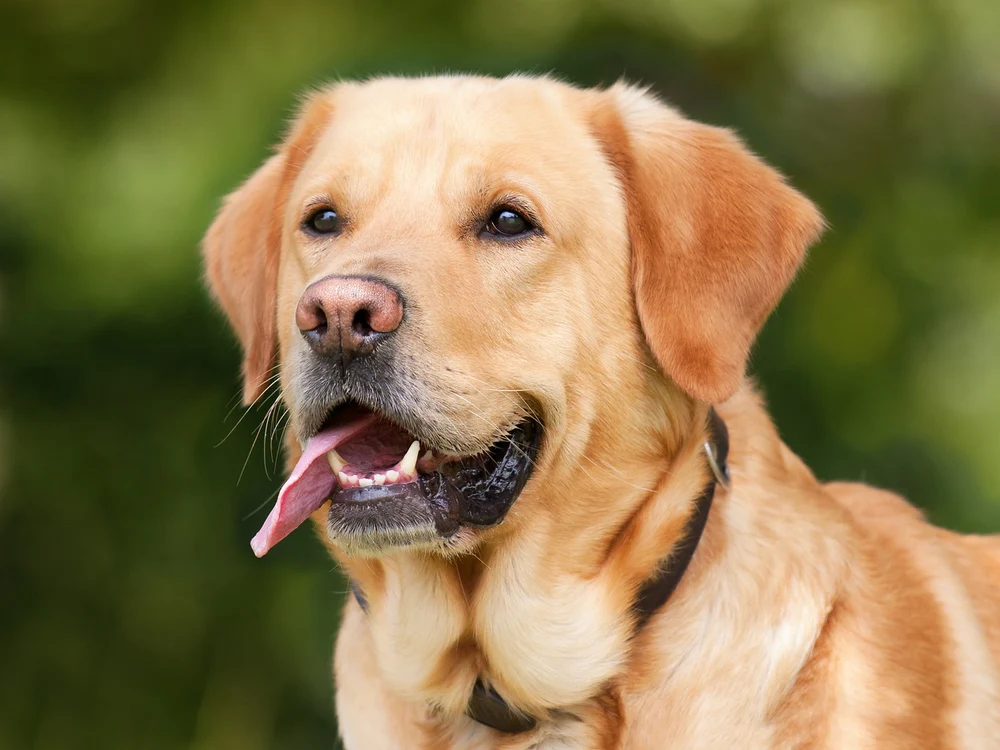

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[4.95434992e-14 1.00000000e+00 2.85939349e-15 5.17162749e-17
  3.45270535e-16 2.49501737e-14 2.37215791e-15 8.05264736e-14
  1.33156188e-14 2.80167790e-18 2.89335295e-15 8.70553866e-15
  2.15001801e-15 1.06482696e-16 7.01500140e-16 2.39606642e-16
  4.69977587e-17 2.82744726e-17 1.73444216e-15 5.80830185e-16
  2.93288017e-15 7.17535705e-17 1.56897005e-17 1.21759704e-17
  9.83126578e-16 7.22021503e-19 3.76284461e-17 1.95302544e-16
  1.34987625e-18 9.79002375e-16 1.72895753e-17 1.13744838e-16
  4.41368148e-18 8.55857707e-16 4.16575859e-16 2.09219835e-17
  8.42961842e-16 2.14123444e-16 1.30201384e-15 1.32564415e-15
  9.12631083e-17 8.48244684e-18 5.78865691e-17 6.09797124e-16
  2.22193170e-17 9.38974982e-18 6.79621319e-17 3.26750801e-17
  3.05748950e-18 5.93762341e-19 3.53919482e-18 2.79401886e-15
  9.41995350e-19 4.13142884e-18 8.00639530e-18 1.41852886e-16
  1.12087316e-17 1.70486805e-18 2.58474255e-17 1.29515298e-15
  1.68604251e-16 5.20674395e-17 1.

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/Cat.jpg


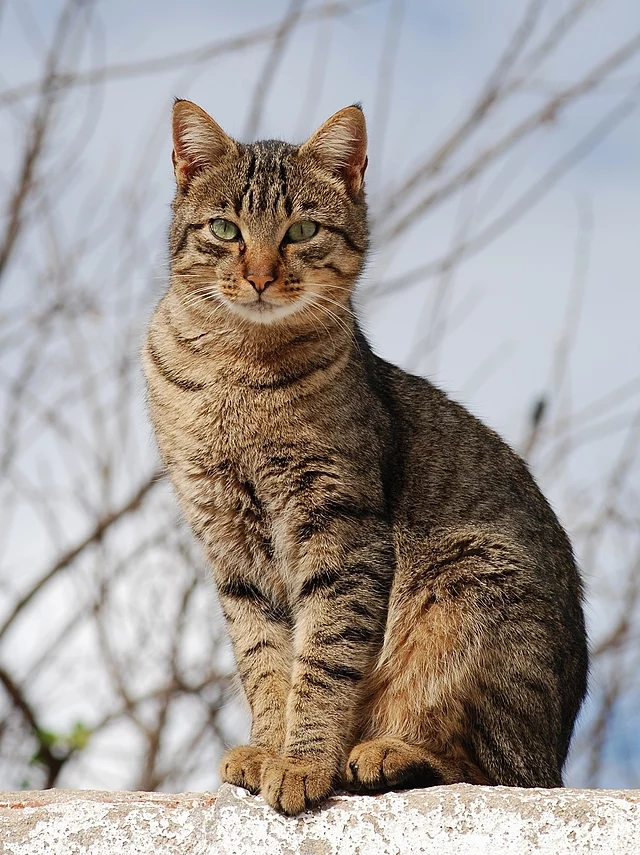

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
[[1.00000000e+00 1.66673429e-11 8.80384497e-14 8.24128713e-17
  9.90697464e-16 8.51481480e-15 1.21099750e-15 6.60347203e-16
  1.52516689e-15 9.61158328e-17 7.19736634e-18 4.19423294e-18
  6.55525209e-18 7.19489555e-18 2.07298873e-17 7.47920404e-16
  3.01514546e-17 4.58357586e-16 4.90539332e-16 3.28928106e-17
  3.72673189e-17 2.24832164e-16 3.44320713e-17 3.52099023e-17
  2.09845795e-16 3.42946787e-18 6.78629099e-17 1.14525485e-16
  1.91217794e-15 2.86285198e-16 7.96971050e-17 1.97028135e-16
  3.95861973e-17 4.25069270e-16 2.41656488e-15 4.60727690e-16
  3.99402478e-16 1.14240615e-15 2.27474815e-14 1.09572404e-15
  7.24030131e-17 8.07261574e-16 1.35526363e-17 2.90590614e-16
  7.94763487e-18 1.42460718e-17 7.05916369e-15 7.62840188e-17
  2.02826338e-15 1.55661923e-15 3.06702325e-17 2.47107082e-15
  1.10861781e-17 1.13615176e-16 9.89521839e-18 6.32973949e-18
  1.00025078e-17 8.50110555e-18 8.12488429e-17 6.70533516e-17
  5.08949011e-16 4.61464905e-15 

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

# Saving the Trained Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pickle

In [ ]:
filename = 'trained_model_dog_cat.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
#loading the saved model
loaded_model = pickle.load(open('trained_model_dog_cat.sav', 'rb'))

Path of the image to be predicted: /content/dog.jpg


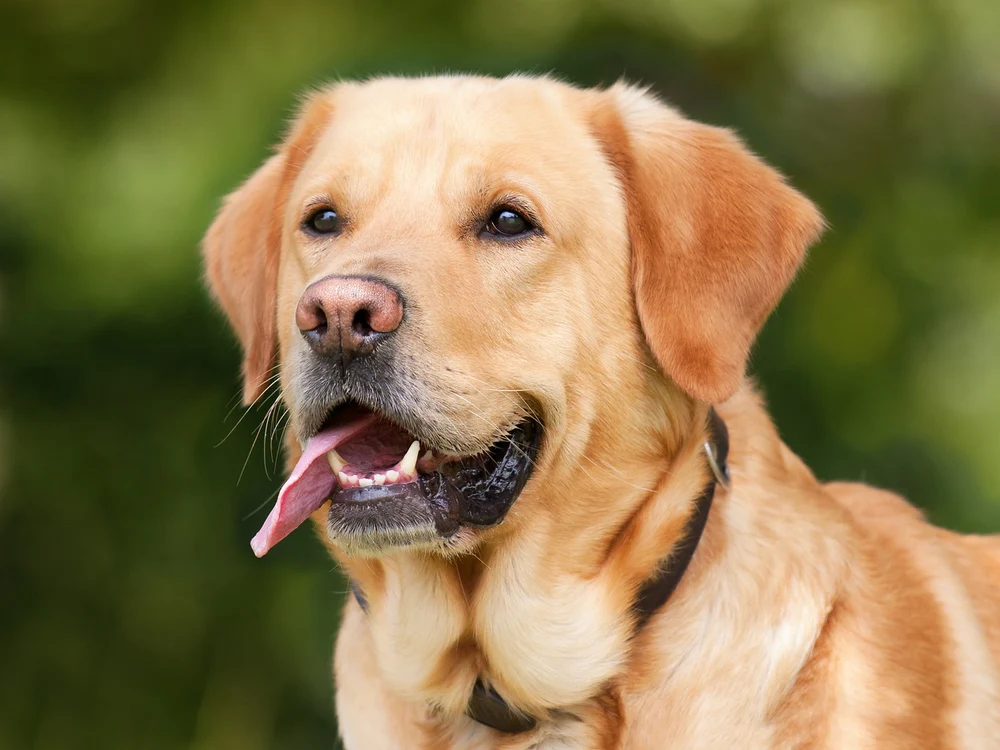

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 960ms/step
[[4.95434992e-14 1.00000000e+00 2.85939349e-15 5.17162749e-17
  3.45270535e-16 2.49501737e-14 2.37215791e-15 8.05264736e-14
  1.33156188e-14 2.80167790e-18 2.89335295e-15 8.70553866e-15
  2.15001801e-15 1.06482696e-16 7.01500140e-16 2.39606642e-16
  4.69977587e-17 2.82744726e-17 1.73444216e-15 5.80830185e-16
  2.93288017e-15 7.17535705e-17 1.56897005e-17 1.21759704e-17
  9.83126578e-16 7.22021503e-19 3.76284461e-17 1.95302544e-16
  1.34987625e-18 9.79002375e-16 1.72895753e-17 1.13744838e-16
  4.41368148e-18 8.55857707e-16 4.16575859e-16 2.09219835e-17
  8.42961842e-16 2.14123444e-16 1.30201384e-15 1.32564415e-15
  9.12631083e-17 8.48244684e-18 5.78865691e-17 6.09797124e-16
  2.22193170e-17 9.38974982e-18 6.79621319e-17 3.26750801e-17
  3.05748950e-18 5.93762341e-19 3.53919482e-18 2.79401886e-15
  9.41995350e-19 4.13142884e-18 8.00639530e-18 1.41852886e-16
  1.12087316e-17 1.70486805e-18 2.58474255e-17 1.29515298e-15
  1.68604251e-16 5.20674395e-17

In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = loaded_model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

In [ ]:
from google.colab import files

# Download the file
files.download('trained_model_dog_cat.sav')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>